In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
data_set=pd.read_csv("C:\\project\\net\\house_price_self\\data.csv")
print(data_set.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [3]:
data_set.count()

date             4600
price            4600
bedrooms         4600
bathrooms        4600
sqft_living      4600
sqft_lot         4600
floors           4600
waterfront       4600
view             4600
condition        4600
sqft_above       4600
sqft_basement    4600
yr_built         4600
yr_renovated     4600
street           4600
city             4600
statezip         4600
country          4600
dtype: int64

In [4]:
data_set.shape#checking the number of rows and column

(4600, 18)

In [5]:
data_set.isnull().sum() #cheking the empty value

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
data_set.describe()#statical representation of values

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
## correlation between the features
# positive
# negative


In [8]:
correlation = data_set.select_dtypes(include='number').corr()


<Axes: >

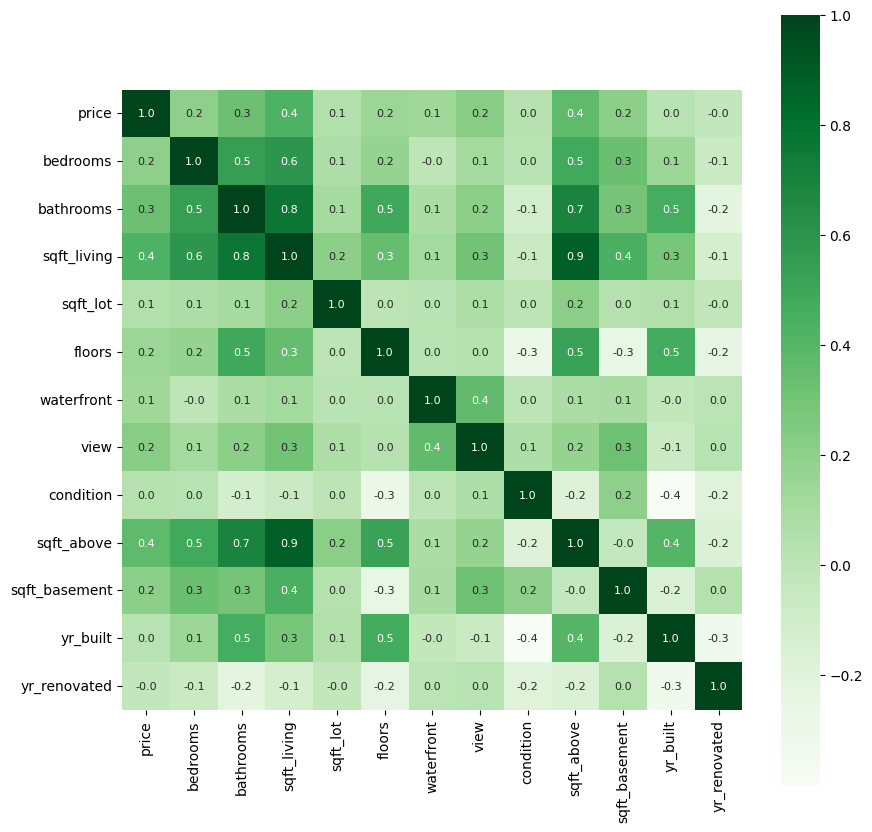

In [9]:
# construction the heat map for understand the correlation 
plt.figure(figsize=(10,10))
sns.heatmap(
    correlation,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size': 8},
    cmap='Greens'   # correct cmap name
)


In [10]:
data_set.drop(['street','city','statezip','country','date'], axis=1, inplace=True)
print(data_set)


             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0       1.75         1510      6360     1.0   
4596  5.343333e+05       3.0       2.50         1460      7573     2.0   
4597  4.169042e+05       3.0       2.50         3010      7014     2.0   
4598  2.034000e+05       4.0       2.00         2090      6630     1.0   
4599  2.206000e+05       3.0       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

In [11]:
print(data_set.columns)


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')


In [12]:
X=data_set.drop(columns='price',axis=1) #seperate the data and labels
y=data_set['price']

In [13]:
print(X.head(),y.head())

   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.50         1340      7912     1.5           0     0   
1       5.0       2.50         3650      9050     2.0           0     4   
2       3.0       2.00         1930     11947     1.0           0     0   
3       3.0       2.25         2000      8030     1.0           0     0   
4       4.0       2.50         1940     10500     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  
0          3        1340              0      1955          2005  
1          5        3370            280      1921             0  
2          4        1930              0      1966             0  
3          4        1000           1000      1963             0  
4          4        1140            800      1976          1992   0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64


In [14]:


X_train,X_test,y_train,y_test=train_test_split(X,y , test_size=0.2, random_state=2)#spliting the data into training and testing

print(X.shape,X_train.shape,X_test.shape)#check the splite the data


(4600, 12) (3680, 12) (920, 12)


## TRAIN THE MODEL 
XGBoost Regression
##

In [15]:
#loading the data into model
model=XGBRegressor()

In [17]:
#training the model with X_trian

model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## EVALUATE
pediction on training data
##

In [21]:
#predict the accuracy on training 
train_data_accuracy=model.predict(X_train)
print(train_data_accuracy)

[368145.   268878.6  466507.62 ... 409889.34 349621.53 506033.3 ]


In [22]:
# R squared error
score_1=metrics.r2_score(train_data_accuracy,y_train)

# Mean Absolute Error
score_2= metrics.mean_absolute_error(train_data_accuracy,y_train)

print('R squared errora :',score_1)
print('Mean Absolute Error:',score_2)

R squared errora : 0.954981617504551
Mean Absolute Error: 60172.629767572034


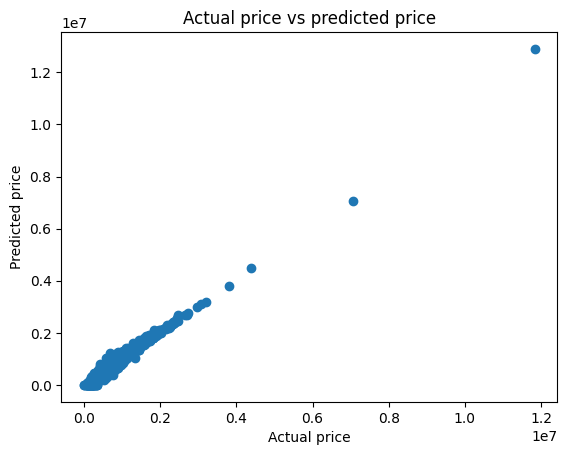

In [26]:
plt.scatter(train_data_accuracy,y_train)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price vs predicted price')
plt.show()

In [24]:
#predict the accuracy on testing
test_data_accuracy=model.predict(X_test)
print(test_data_accuracy)

In [25]:
# R squared error
score_1=metrics.r2_score(test_data_accuracy,y_test)

# Mean Absolute Error
score_2= metrics.mean_absolute_error(test_data_accuracy,y_test)

print('R squared errora :',score_1)
print('Mean Absolute Error:',score_2)

R squared errora : -6.080751138698335
Mean Absolute Error: 199981.27606724022
